# Дополнительный проект
В данном проекте вы поработаете с довольно нетипичными для аналитика данными: `gff` файлом, который описывает геном мухи (описание формата можно найти здесь). При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

# Задачи
1. Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x
2. Выясните, какое из этих значений является самым частым
3. Постройте распределение встречаемости значений в столбце type

**1. Какое значение атрибута Parent самое частое?**

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [152]:
df = pd.read_csv('data/gff.tsv', sep='\t')
df

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
507,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
508,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
509,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
510,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1


In [253]:
df.attributes.astype(str).unique()

array(['Parent=XM_001475631.1',
       'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,',
       'ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603',
       'ID=;Parent=XM_001475631.1'], dtype=object)

In [223]:
df.attributes.str.findall('Parent=(.*)').astype(str).unique()
#^[^,]
#extract('(?<Parent>)Parent.*')

array(["['XM_001475631.1']", "['XM_001475631.1,']",
       "['NC_000083.5:LOC100040603']"], dtype=object)

In [251]:
#без :LOC
df.attributes.str.findall('Parent=([\w\.]*)').astype(str).unique()

array(["['XM_001475631.1']", "['NC_000083.5']"], dtype=object)

In [ ]:
#:LOC это часть парента? я думаю да

In [257]:
#добавил :LOC
df.attributes.str.findall('Parent=([\w\.:]*)').astype(str).unique()

array(["['XM_001475631.1']", "['NC_000083.5:LOC100040603']"], dtype=object)

In [283]:
par = df.attributes.str.findall('Parent=([\w\.:]*)') 
par

0      [XM_001475631.1]
1      [XM_001475631.1]
2      [XM_001475631.1]
3      [XM_001475631.1]
4      [XM_001475631.1]
             ...       
507    [XM_001475631.1]
508    [XM_001475631.1]
509    [XM_001475631.1]
510    [XM_001475631.1]
511    [XM_001475631.1]
Name: attributes, Length: 512, dtype: object

In [267]:
pattern = r'Parent=(?P<parent>[\w\.:]+)'
par = df.attributes.str.extract(pattern)
par

,parent
0,XM_001475631.1
1,XM_001475631.1
2,XM_001475631.1
3,XM_001475631.1
4,XM_001475631.1
...,...
507,XM_001475631.1
508,XM_001475631.1
509,XM_001475631.1
510,XM_001475631.1


In [268]:
par.value_counts()

parent                  
XM_001475631.1              479
NC_000083.5:LOC100040603     33
Name: count, dtype: int64

Ответ: XM_001475631.1

**2. Какое самое частое значение в колонке type?**

In [285]:
df.type.value_counts()

type
exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: count, dtype: int64

* **exon**
* CDS
* five_prime_UTR
* mRNA
* protein
* three_prime_UTR

**3. Постройте распределение встречаемости значений в столбце type**

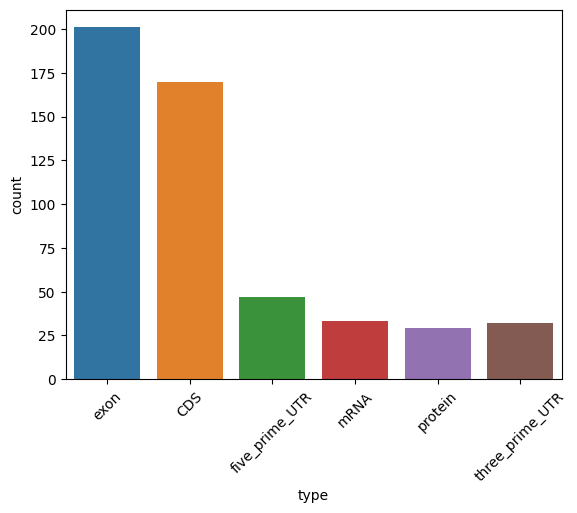

In [295]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='type', ax=ax)
ax.tick_params(axis='x', rotation=45)